In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
bangalore_df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')

In [131]:
print(bangalore_df.shape)
bangalore_df.head()

(11894, 5)


,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [132]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [133]:
bangalore_df['time'] = pd.to_datetime(bangalore_df['time'], errors='coerce')

In [134]:
bangalore_df.set_index(['time'], inplace = True)

In [135]:
drop_df = bangalore_df.dropna()

missing_pctg = round((drop_df.shape[0]/bangalore_df.shape[0])*100,2)
print(missing_pctg,'% of data contain NaN values')

51.14 % of data contain NaN values


In [136]:
bangalore_df[bangalore_df.isna().sum(axis=1) > 3] 

,tavg,tmin,tmax,prcp
time,,,,
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


In [137]:
bangalore_df = bangalore_df.dropna(how='all')

In [138]:
bangalore_df.index = bangalore_df.index.to_series().fillna(method='ffill')

C:\Users\Tarunkumar k\AppData\Local\Temp\ipykernel_19496\2733632513.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bangalore_df.index = bangalore_df.index.to_series().fillna(method='ffill')


In [139]:
bangalore_df = bangalore_df.interpolate(method='time')

In [140]:
bangalore_df.isna().sum()

tavg    0
tmin    0
tmax    0
prcp    1
dtype: int64

In [141]:
bangalore_df.head()

,tavg,tmin,tmax,prcp
time,,,,
1990-01-01,22.9,19.100000,28.4,NaN
1990-02-01,21.7,14.552381,26.5,0.0
1990-03-01,21.0,16.400000,26.5,0.0
1990-04-01,20.8,21.466667,27.4,0.0
1990-05-01,20.4,14.200000,26.1,0.0


In [142]:
bangalore_df.fillna(0,inplace=True) #filling the leftover nan value

In [143]:
bangalore_df.isna().sum()

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

In [144]:
bangalore_df[bangalore_df['tmax'] == max(bangalore_df['tmax'])]

,tavg,tmin,tmax,prcp
time,,,,
2016-12-04,27.5,24.4,39.2,0.0


In [145]:
#date at which temperature(tmin) was lowest
bangalore_df[bangalore_df['tmin'] == min(bangalore_df['tmin'])]

,tavg,tmin,tmax,prcp
time,,,,
1992-12-08,21.8,9.3,26.5,2.3


In [146]:
#date at which precipitation was the highest
bangalore_df[bangalore_df['prcp'] == max(bangalore_df['prcp'])]

,tavg,tmin,tmax,prcp
time,,,,
2007-12-07,23.2,21.0,29.2,271.3


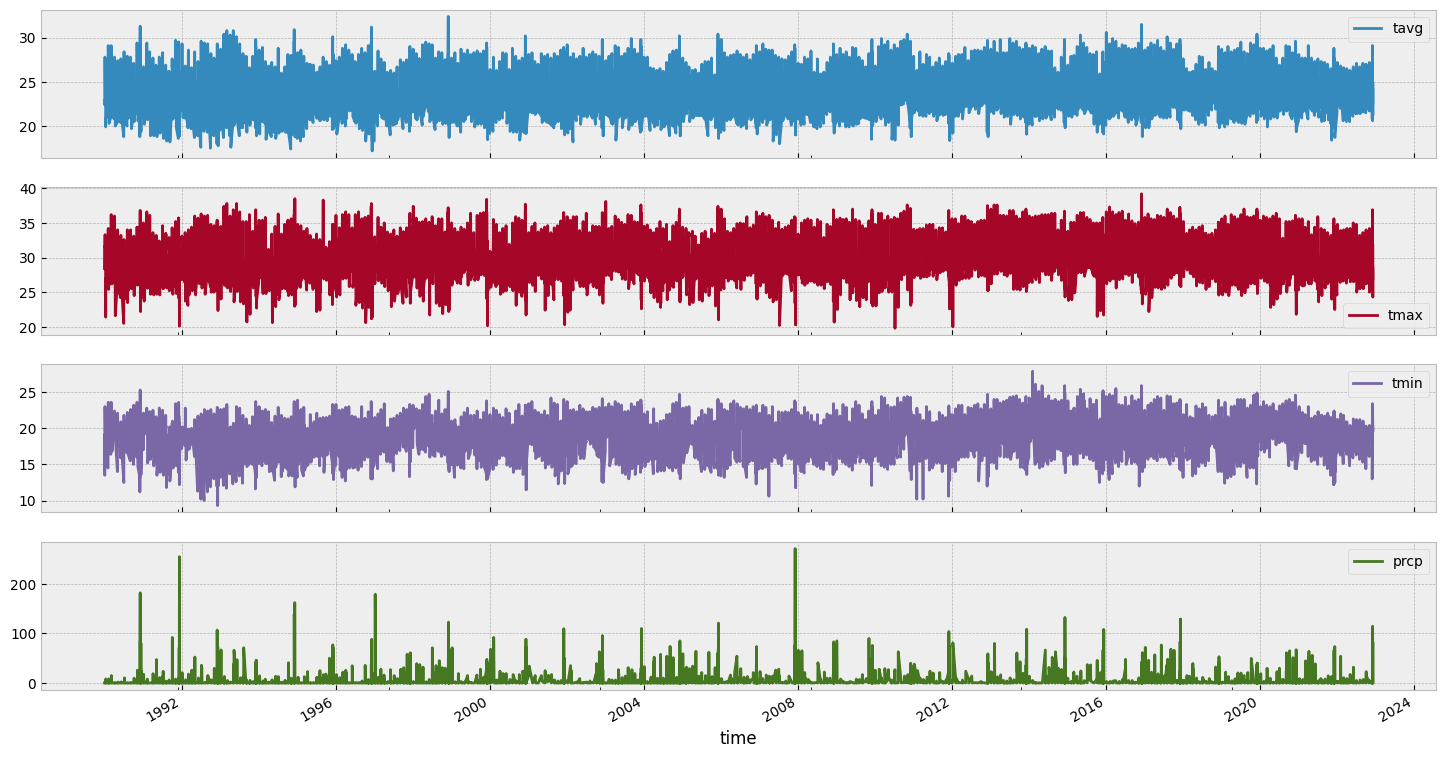

In [147]:
plt.style.use('bmh')
bangalore_df[['tavg','tmax','tmin','prcp']].plot(subplots=True, figsize=(18,10));

In [148]:
bangalore_year = bangalore_df.groupby(bangalore_df.index.year).mean()

In [149]:
bangalore_year = bangalore_df.groupby(bangalore_df.index.year).mean()
bangalore_year #yearwise averages

,tavg,tmin,tmax,prcp
time,,,,
1990,23.703134,19.126194,29.293881,2.098718
1991,23.626111,19.104373,29.327153,3.289444
1992,23.224148,18.445997,29.219602,2.405540
1993,23.637673,18.884171,29.527041,2.538287
1994,23.427072,18.889948,29.132728,2.374309
1995,23.888611,19.198373,29.526911,4.329533
1996,23.633611,18.982462,29.748082,2.921210
1997,23.667222,19.526531,29.901488,3.522454
1998,24.226099,19.974492,30.181546,4.150450


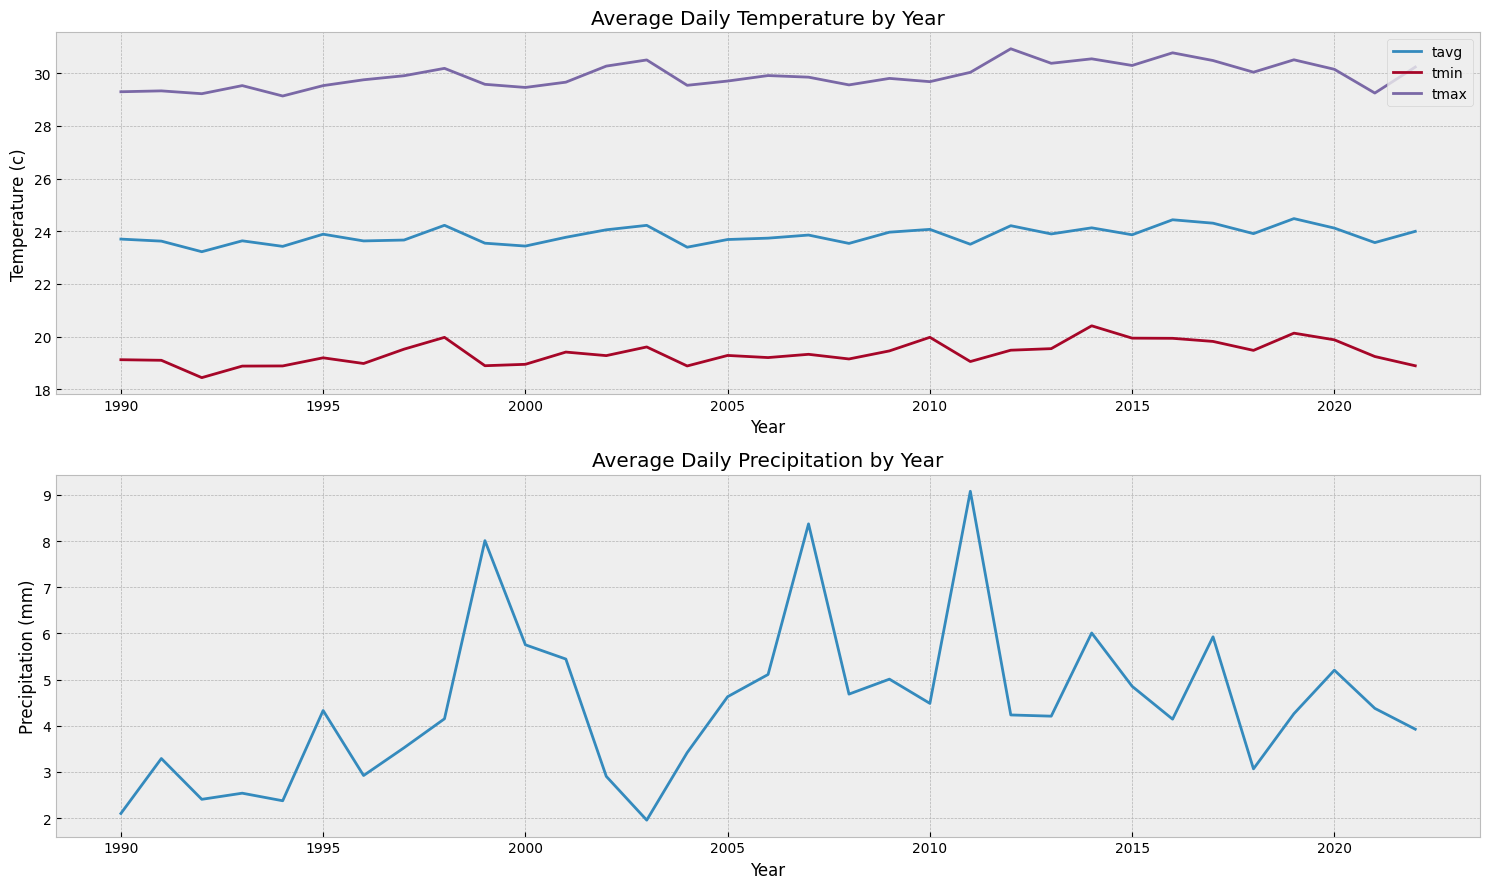

In [150]:
f, axes = plt.subplots(nrows = 2, figsize =(15,9))
ax = bangalore_year[['tavg','tmin','tmax']].plot(ax=axes[0])
ax.set_ylabel('Temperature (c)')
ax.set_xlabel('Year')
ax.set_title('Average Daily Temperature by Year')

ax = bangalore_year['prcp'].plot(ax=axes[1])
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Year')
ax.set_title('Average Daily Precipitation by Year')

plt.tight_layout()

C:\Users\Tarunkumar k\AppData\Local\Temp\ipykernel_19496\1869879750.py:4: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  data = bangalore_df.groupby(bangalore_df.index.month, as_index=False)[['tavg','tmin','tmax','prcp']].mean()


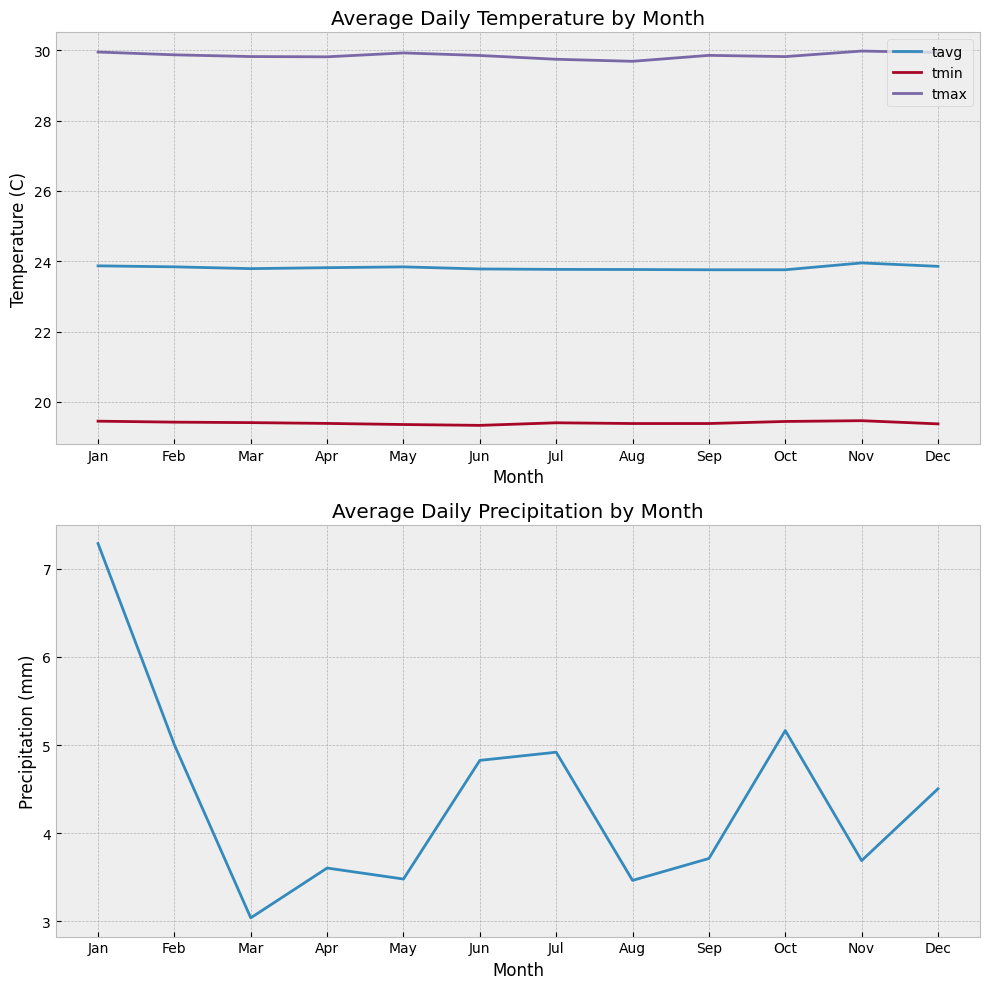

In [151]:
months = ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']

data = bangalore_df.groupby(bangalore_df.index.month, as_index=False)[['tavg','tmin','tmax','prcp']].mean()

f, axes = plt.subplots(nrows=2, figsize=(10,10))
ax = data[['tavg','tmin','tmax']].plot(ax=axes[0])
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Temperature by Month')

ax = data['prcp'].plot(ax=axes[1]);
ax.set_ylabel('Precipitation (mm)')
ax.set_xlabel('Month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(months)
ax.set_title('Average Daily Precipitation by Month')

plt.tight_layout()

In [152]:
bangalore_df['year'] = bangalore_df.index.year
bangalore_df['mnth'] = bangalore_df.index.month

In [153]:
month_df = bangalore_df.groupby(['year','mnth'], as_index=False)[['tavg','prcp']].mean()

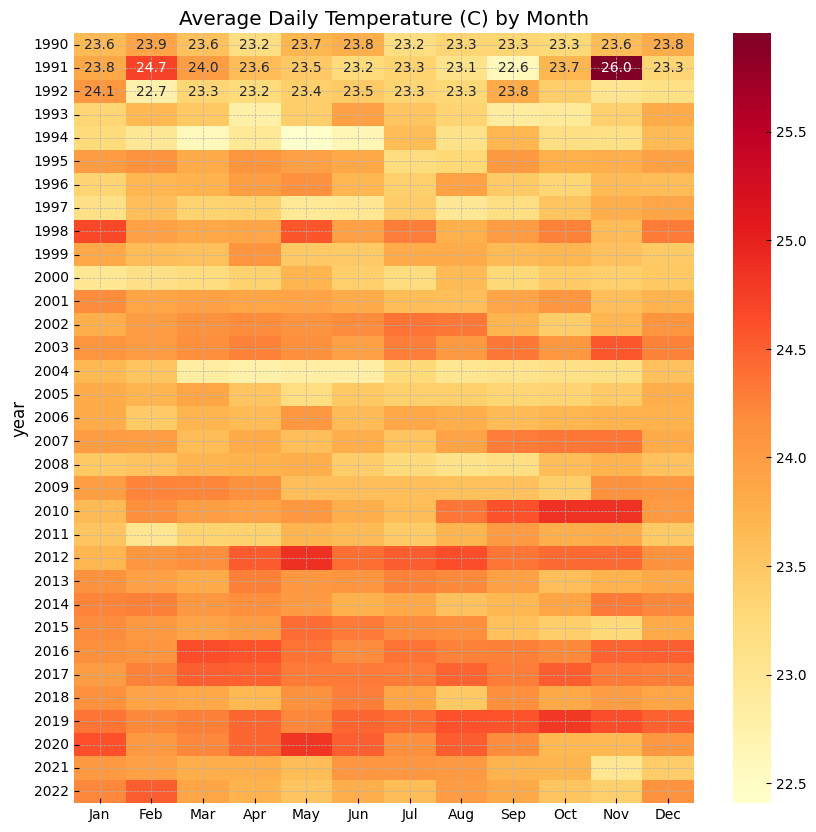

In [154]:
data = month_df.pivot(index='year', columns='mnth', values='tavg')
data.columns = months

plt.subplots(figsize=(10,10))
sns.heatmap(data, cmap='YlOrRd',annot=True, fmt='.1f')
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.show()

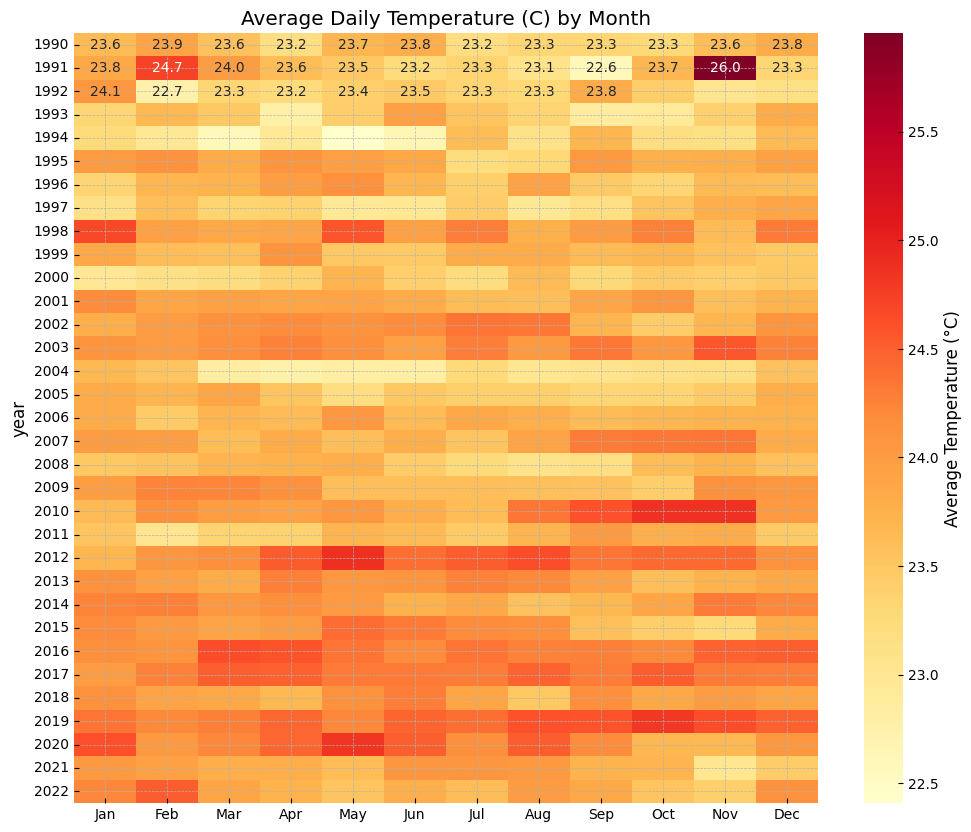

            Jan        Feb        Mar        Apr        May        Jun  \
year                                                                     
1990  23.641667  23.908333  23.558333  23.175000  23.690909  23.791667   
1991  23.841667  24.725000  23.991667  23.616667  23.475000  23.233333   
1992  24.058333  22.745455  23.316667  23.241667  23.416667  23.466667   
1993  23.325000  23.666667  23.491667  22.783333  23.425000  23.950000   
1994  23.250000  22.966667  22.583333  22.958333  22.408333  22.633333   
1995  24.008333  24.108333  23.816667  24.091667  23.972727  23.850000   
1996  23.341667  23.691667  23.725000  23.983333  24.133333  23.691667   
1997  23.116667  23.608333  23.358333  23.375000  22.950000  22.981818   
1998  24.666667  23.941667  23.850000  23.883333  24.575000  23.933333   
1999  23.858333  23.616667  23.575000  24.090909  23.475000  23.466667   
2000  22.983333  23.125000  23.216667  23.375000  23.708333  23.408333   
2001  24.191667  23.900000  23.958333 

In [155]:
# Pivot the DataFrame
data = month_df.pivot(index='year', columns='mnth', values='tavg')

# Rename columns to more readable month names
# Assuming 'months' is a list of month names such as ['Jan', 'Feb', ..., 'Dec']
data.columns = months

# Check for NaN values and handle them
data = data.fillna(0)  # or use data.fillna(data.mean()) to fill with the mean

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data, cmap='YlOrRd', annot=True, fmt='.1f', annot_kws={"size": 10}, cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.show()
print(data)


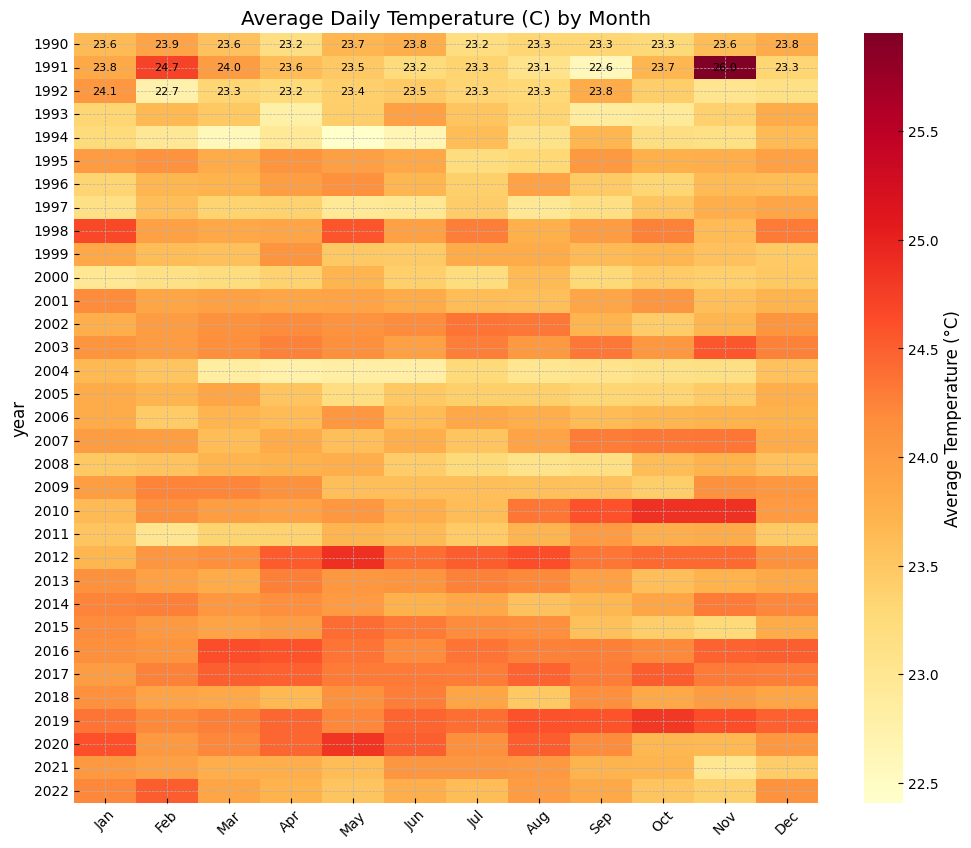

In [156]:
data = month_df.pivot(index='year', columns='mnth', values='tavg')

# Rename columns to more readable month names
# Assuming 'months' is a list of month names such as ['Jan', 'Feb', ..., 'Dec']
data.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Check for NaN values and handle them
data = data.fillna(data.mean())  # or fill with 0: data.fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data, cmap='YlOrRd', annot=True, fmt='.1f', annot_kws={"size": 8, "color": "black"}, cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

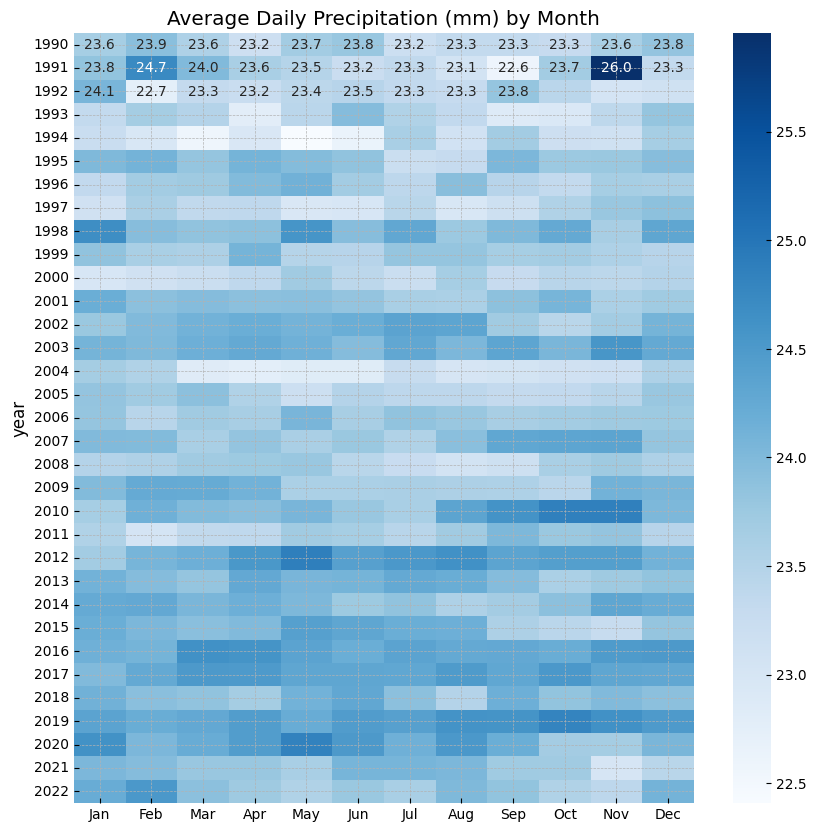

In [157]:
data = month_df.pivot(index='year', columns='mnth', values='tavg')
data.columns = months

plt.subplots(figsize=(10,10))
sns.heatmap(data,cmap='Blues',annot=True, fmt='.1f')
plt.title('Average Daily Precipitation (mm) by Month')
plt.yticks(rotation=0)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

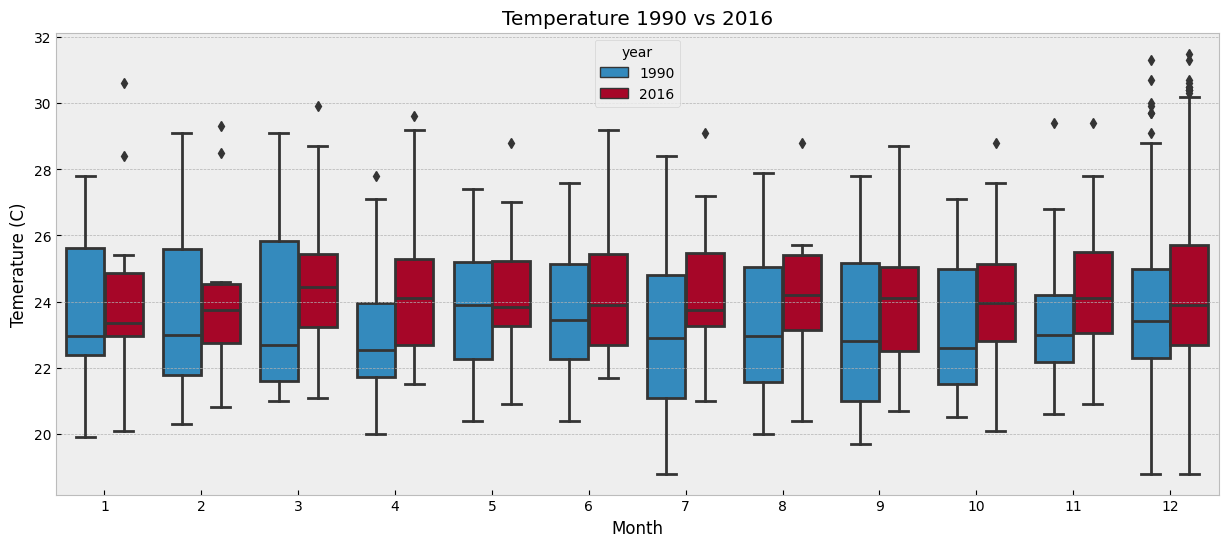

In [158]:
data = bangalore_df[bangalore_df['year'].isin([1990,2016])]

plt.subplots(figsize=(15,6))
sns.boxplot(x='mnth', y='tavg', hue='year', data=data,saturation=1)
plt.xlabel('Month')
plt.ylabel('Temerature (C)')
plt.title('Temperature 1990 vs 2016');


C:\Users\Tarunkumar k\AppData\Local\Temp\ipykernel_19496\1903937016.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth',y='prcp', hue='year', data=data,ci=None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C

AttributeError: 'numpy.int32' object has no attribute 'startswith'

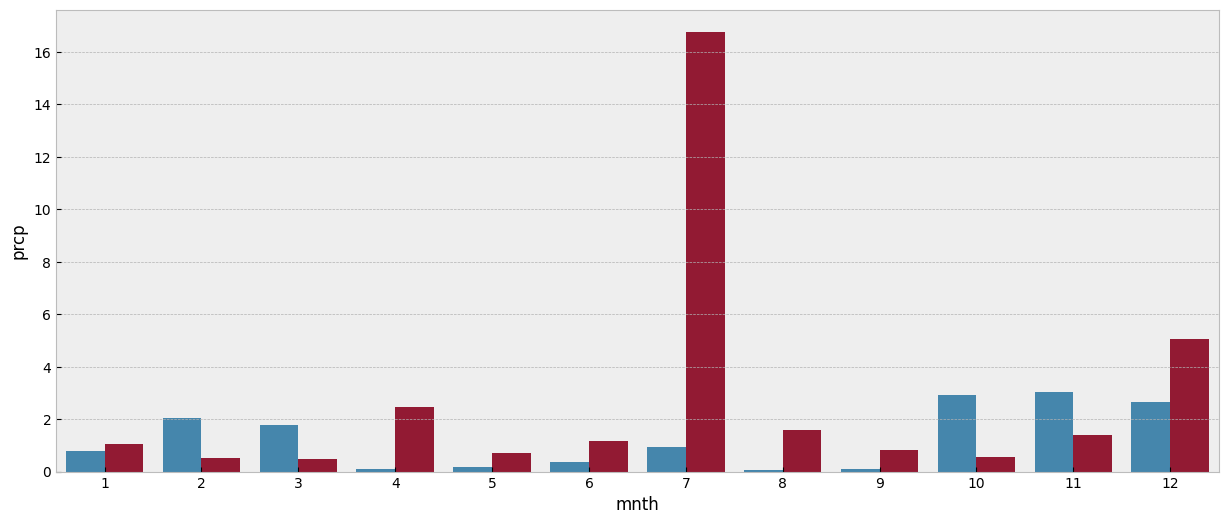

In [159]:
plt.subplots(figsize=(15,6))
sns.barplot(x='mnth',y='prcp', hue='year', data=data,ci=None)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation 1990 vs 2016');

In [ ]:
print(data.head())